                                         Description  target_H5_HPAI
0  Northern Shoveler observed in North Bull Islan...               0
1  Northern Pintail observed in North Bull Island...               1
2  Northern Pintail observed in North Bull Island...               1
3  Northern Pintail observed in North Bull Island...               1
4  Green-winged Teal (Eurasian) observed in North...               0
Epoch 1/10


c:\Users\MADHU\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.6930 - val_accuracy: 1.0000 - val_loss: 0.6610
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7500 - loss: 0.6777 - val_accuracy: 1.0000 - val_loss: 0.6300
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.7500 - loss: 0.6657 - val_accuracy: 1.0000 - val_loss: 0.5978
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.7500 - loss: 0.6492 - val_accuracy: 1.0000 - val_loss: 0.5628
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7500 - loss: 0.6308 - val_accuracy: 1.0000 - val_loss: 0.5227
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.7500 - loss: 0.6185 - val_accuracy: 1.0000 - val_loss: 0.4759
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.7500 - loss: 0.5882 - val_accuracy: 1.0000 - val_loss: 0.4189
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7500 - loss: 0.5851 - val_accuracy: 1.0000 - val_loss: 0.3520
Epoch 

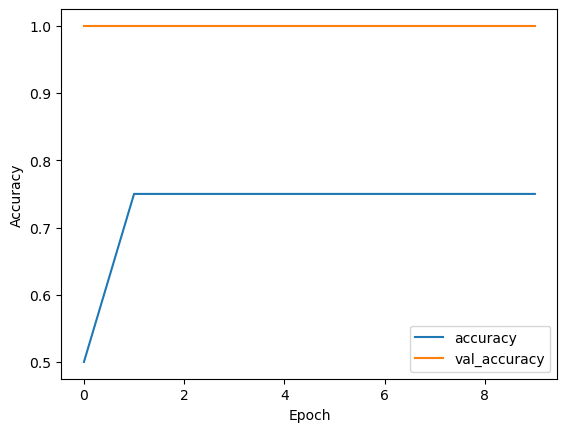

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Avian Influenza (HPAI)edit.csv')

# Simulate a text column (e.g., 'Description') for NLP
# Combine 'Common_Name', 'Locality', and 'Date' to create a text description
df['Description'] = df['Common_Name'] + " observed in " + df['Locality'] + " on " + df['Date'].astype(str)

# Display the first few rows of the dataset with the new 'Description' column
print(df[['Description', 'target_H5_HPAI']].head())

# Preprocessing
# Extract text data and target
texts = df['Description']  # Text data
y = df['target_H5_HPAI']   # Target labels

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # Limit vocabulary to the top 5000 words
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform input size
max_len = 100  # Maximum sequence length
X = pad_sequences(sequences, maxlen=max_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model for NLP
model = Sequential()

# Add an Embedding layer (maps words to dense vectors)
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))

# Add an LSTM layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Add a Dense output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()